## Assignment 2B: t-SNE Implementation Assignment on HAR Dataset

In [1]:
#Importing required libraries
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings('ignore')

### TASK 1: Data Preprocessing and Exploration

In [2]:
#Load the Datasets

#Load train.csv
train_data = pd.read_csv('/Users/payalchavan/Downloads/HAR_train.csv')

#Load test.csv
test_data = pd.read_csv('/Users/payalchavan/Downloads/HAR_test.csv')

In [3]:
train_data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [4]:
test_data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [5]:
#Take a look at the data structure
train_data.shape, test_data.shape

((7352, 563), (2947, 563))

In [6]:
#Checking for duplicate records
print('No of duplicates in train: {}'.format(sum(train_data.duplicated())))
print('No of duplicates in test : {}'.format(sum(test_data.duplicated())))

No of duplicates in train: 0
No of duplicates in test : 0


In [7]:
#Separate "Activity" column from the train data
train_activity = train_data['Activity']
test_activity = test_data['Activity']

In [8]:
#Map the "Activity" column to numerical values
activity_mapping = {'STANDING': 1, 'SITTING': 2, 'LAYING': 3, 'WALKING': 4, 'WALKING_DOWNSTAIRS': 5, 'WALKING_UPSTAIRS': 6}
train_activity = train_activity.map(activity_mapping)

test_activity = test_activity.map(activity_mapping)

In [9]:
#Replace the "Activity" column in the train data with the numerical values
train_data['Activity'] = train_activity
test_data['Activity'] = test_activity

In [10]:
#Add "ActivityName" column to the train data
train_activity = train_activity.map({1: 'STANDING', 2: 'SITTING', 3: 'LAYING', 4: 'WALKING', 5: 'WALKING_DOWNSTAIRS', 6: 'WALKING_UPSTAIRS'})
# train_data['ActivityName'] = train_activity
test_activity = test_activity.map({1: 'STANDING', 2: 'SITTING', 3: 'LAYING', 4: 'WALKING', 5: 'WALKING_DOWNSTAIRS', 6: 'WALKING_UPSTAIRS'})

In [18]:
train_activity.unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [11]:
#Handling Missing Values

#Fill missing values in train data with mean (for numerical columns) or mode (for categorical columns)
for column in train_data.columns:
    if train_data[column].dtype == np.number:
        train_data[column].fillna(train_data[column].mean(), inplace=True)
    else:
        train_data[column].fillna(train_data[column].mode()[0], inplace=True)

#Fill missing values in test data with mean (for numerical columns) or mode (for categorical columns)
for column in test_data.columns:
    if test_data[column].dtype == np.number:
        test_data[column].fillna(test_data[column].mean(), inplace=True)
    else:
        test_data[column].fillna(test_data[column].mode()[0], inplace=True)

#Converting Categorical Variables to Numerical

#Initialize LabelEncoder
le = LabelEncoder()

#Convert categorical variables in train data to numerical
for column in train_data.columns:
    if train_data[column].dtype == 'object':
        train_data[column] = le.fit_transform(train_data[column])

#Convert categorical variables in test data to numerical
for column in test_data.columns:
    if test_data[column].dtype == 'object':
        test_data[column] = le.fit_transform(test_data[column])


#Column names have -,() so we will replace them with ''
train_data.columns = train_data.columns.str.replace('[()-]', '', regex=True)
test_data.columns = test_data.columns.str.replace('[()-]', '', regex=True)

#Scaling the Features

#Initialize StandardScaler
scaler = StandardScaler()

#Scale features in train data
train_data = pd.DataFrame(scaler.fit_transform(train_data), columns=train_data.columns)

#Scale features in test data
test_data = pd.DataFrame(scaler.transform(test_data), columns=test_data.columns)

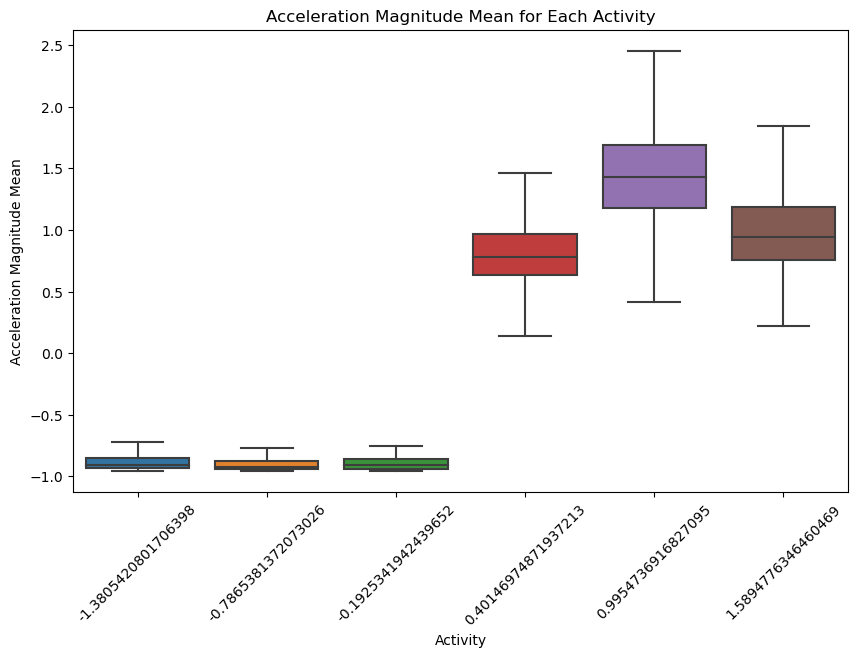

In [12]:
#Perform exploratory data analysis
#Activity Name to Accelatation Magnitude Mean 

plt.figure(figsize=(10, 6))
sns.boxplot(x='Activity', y='tBodyAccMagmean', data=train_data, showfliers=False)
plt.ylabel('Acceleration Magnitude Mean')
# use xlabel with train_activity to get the activity names
plt.xlabel('Activity')
plt.title('Acceleration Magnitude Mean for Each Activity')
plt.xticks(rotation=45)
plt.show()

Insights: From the above box plot, we can make the following observations-
    1) The activities are either standing, sitting, or lying if tAccMean is less than -0.5.
    2) The activities are either Walking, Walking Downstairs, or Walking Upstairs if tAccMean is greater than -0.6.
    3) Walking downstairs is the activity if tAccMean > 1.0.
    4) 75% of the Activity labels can be classified, with some inaccuracies.

### TASK 2: Basic t-SNE Visualization

### TASK 3: Parameter Impact Analysis

### TASK 4: t-SNE with Different Learning Rates

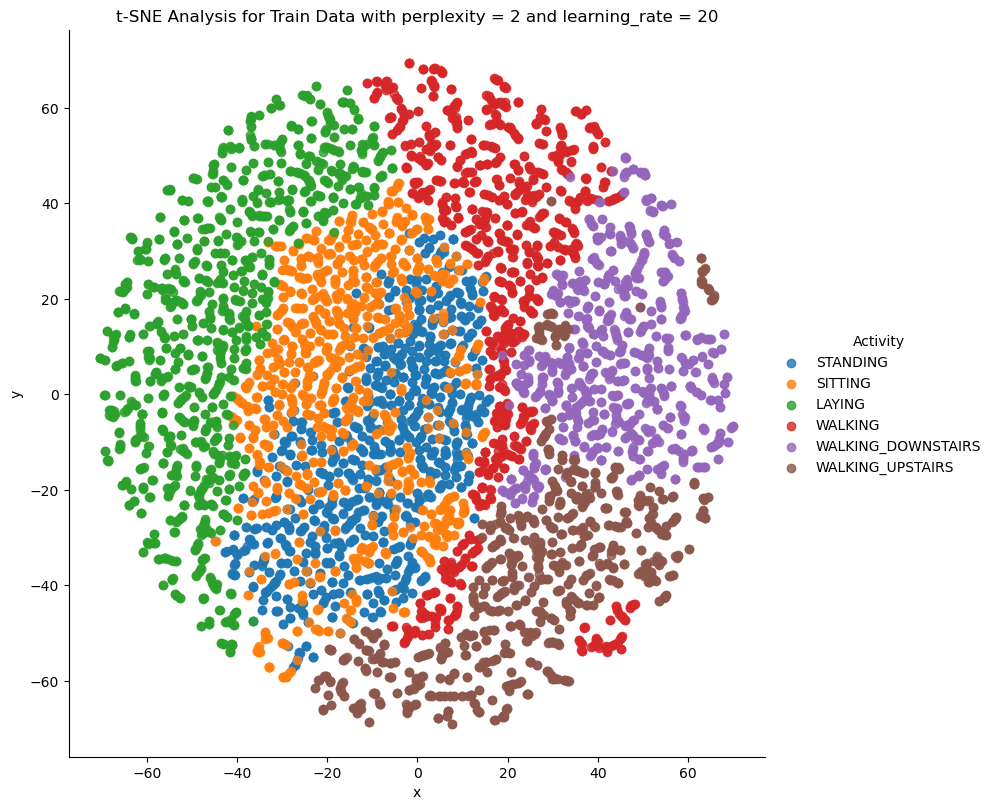

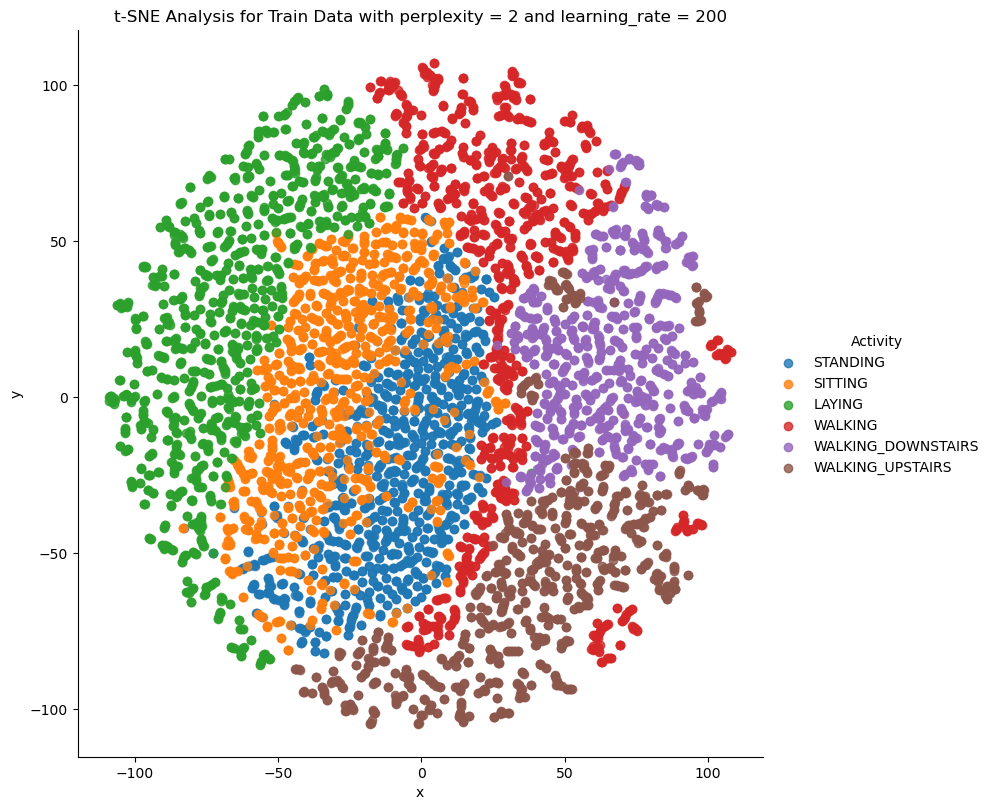

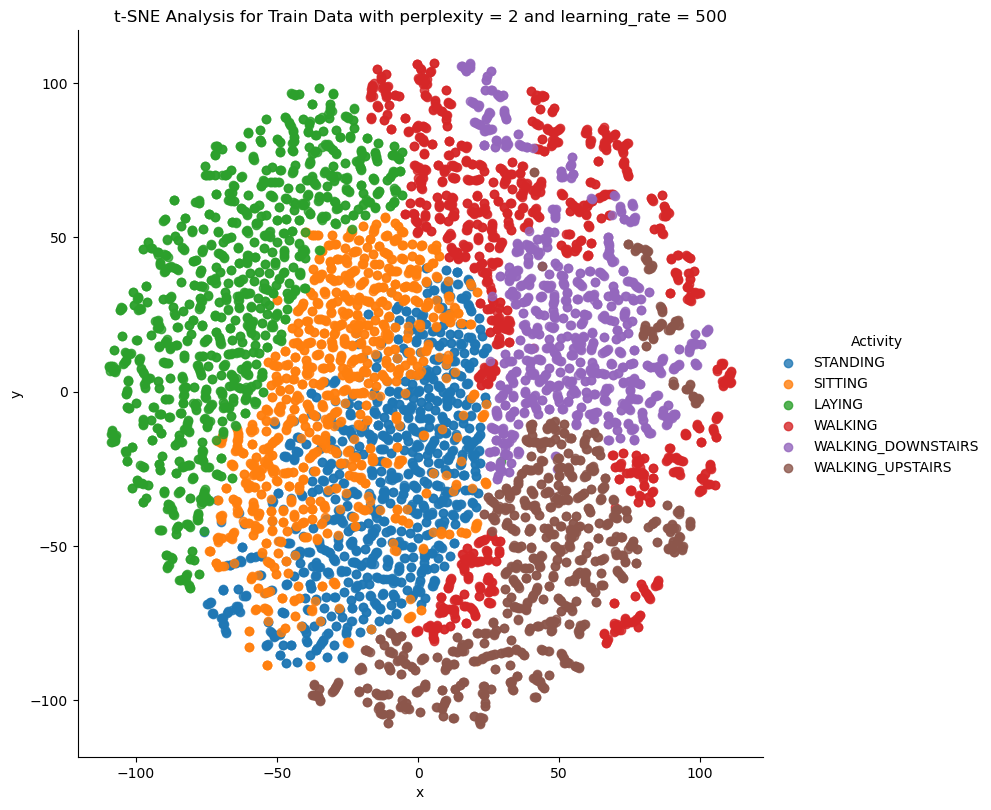

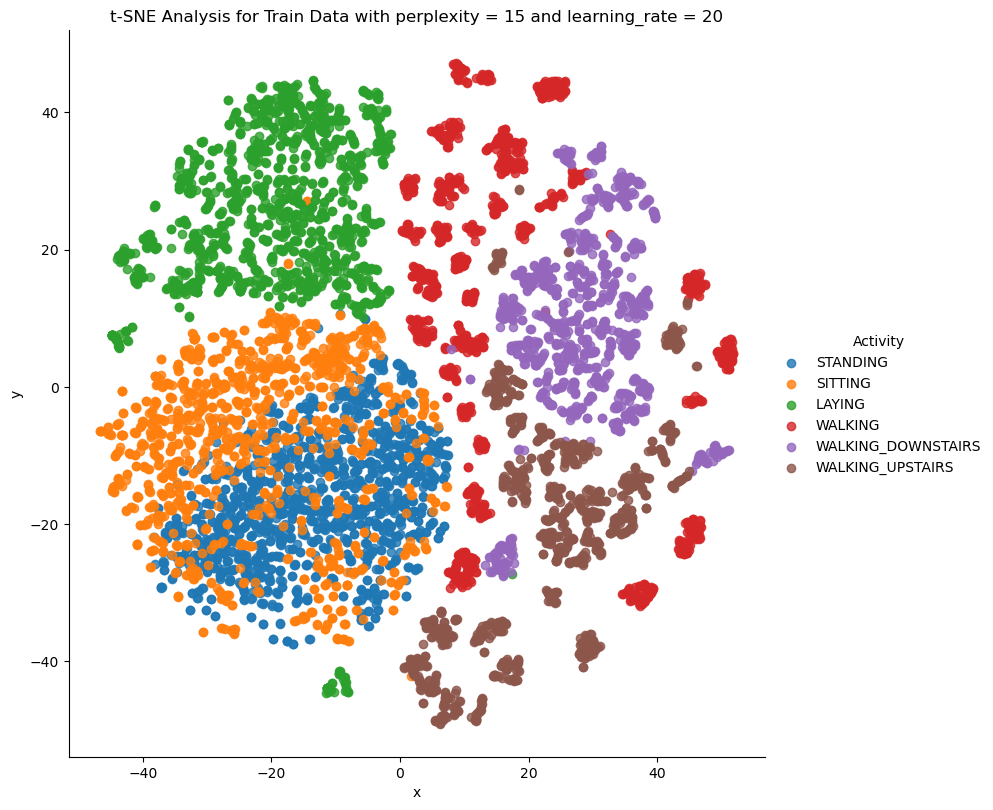

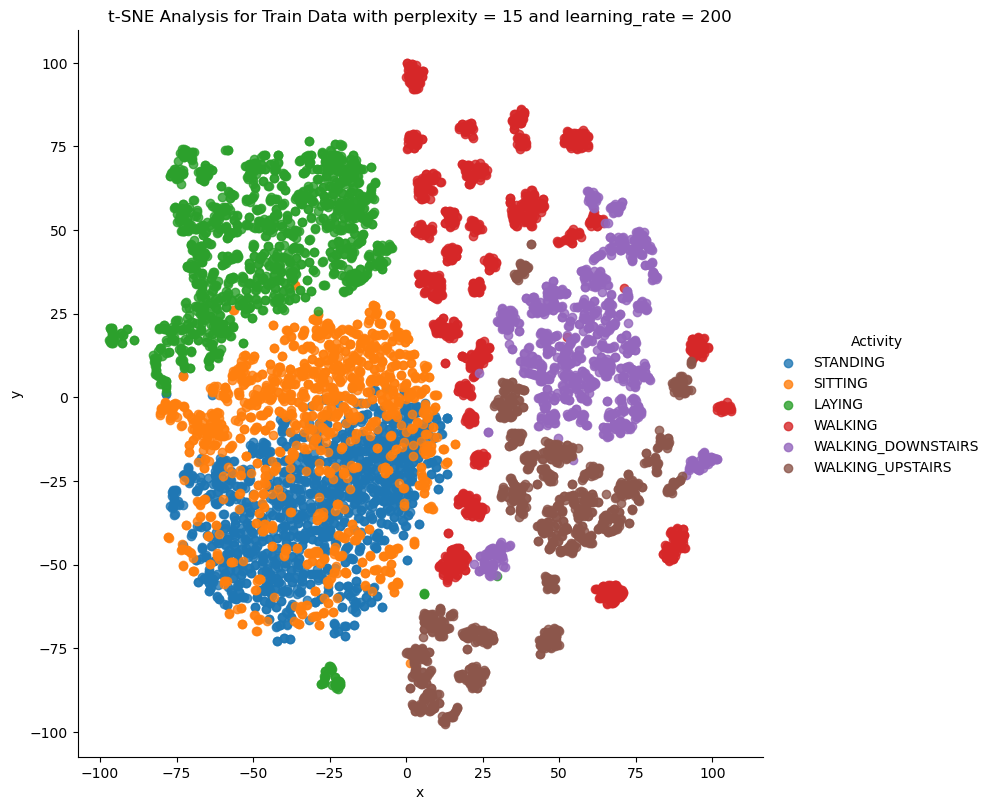

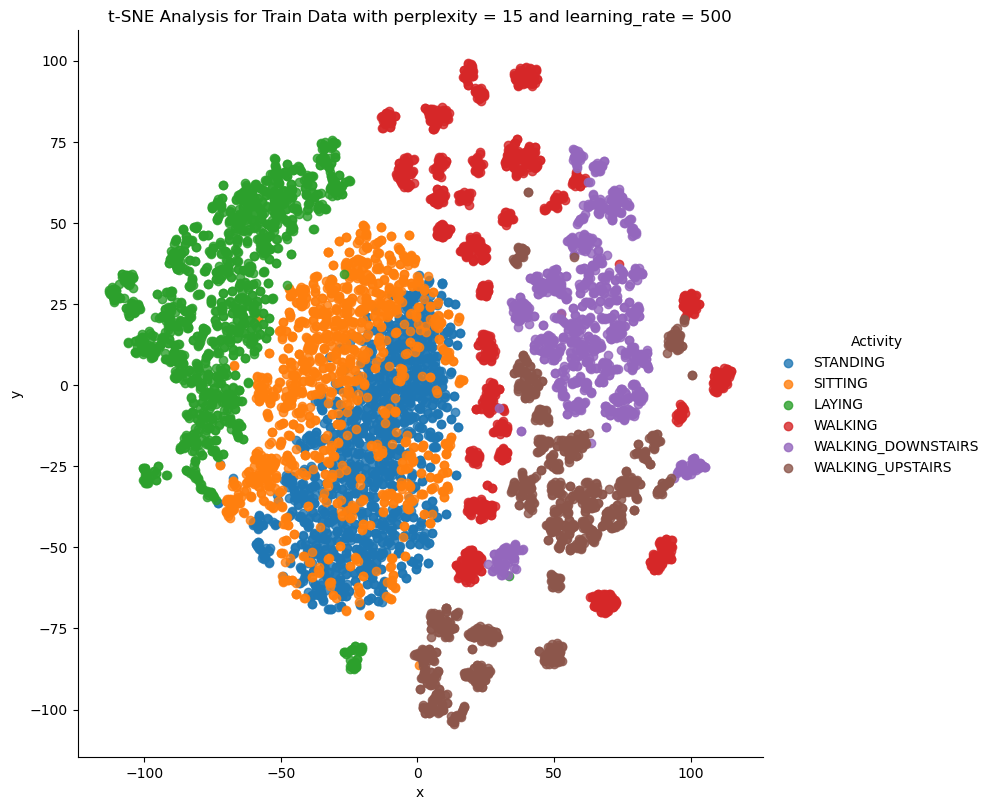

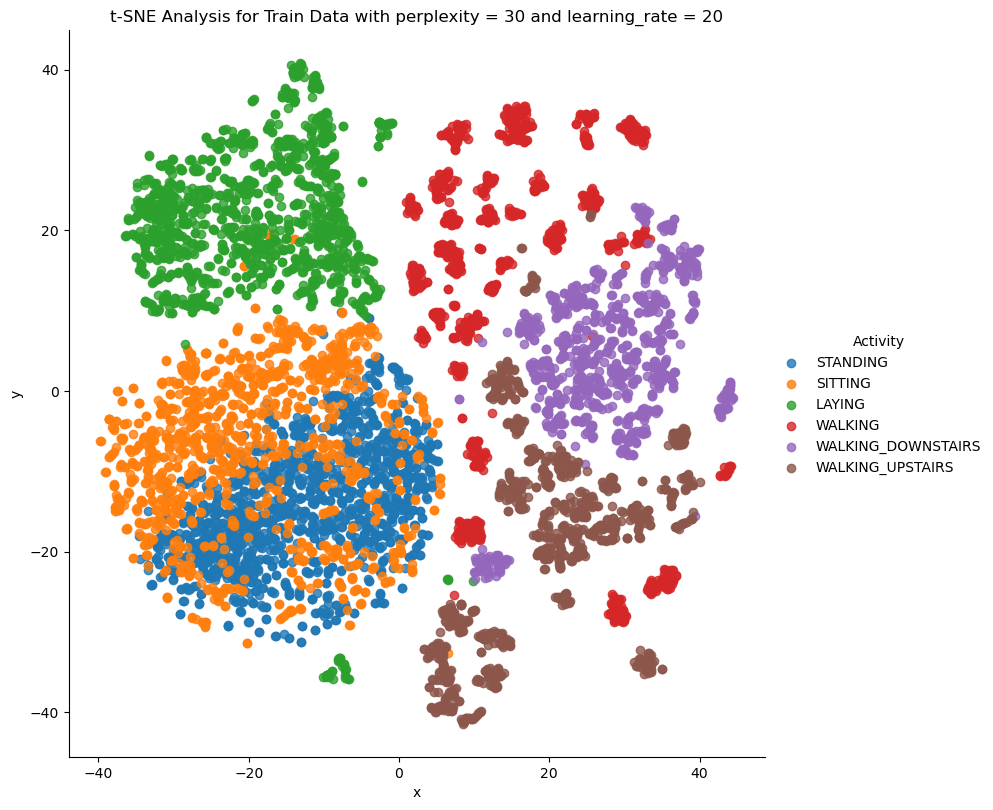

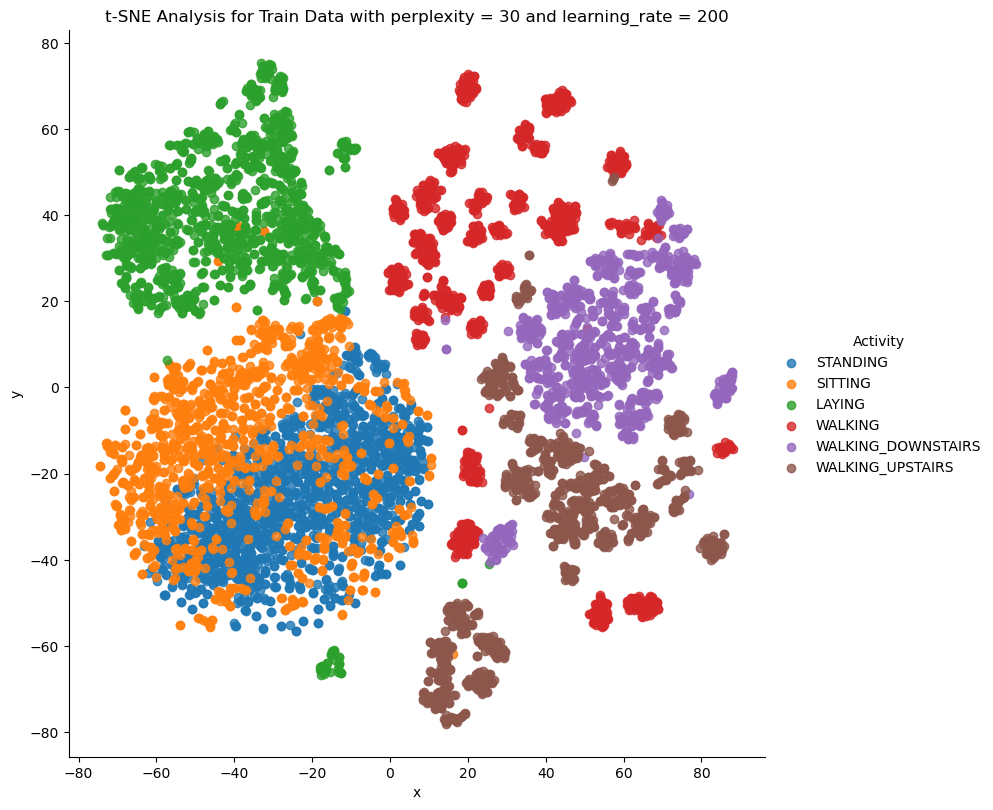

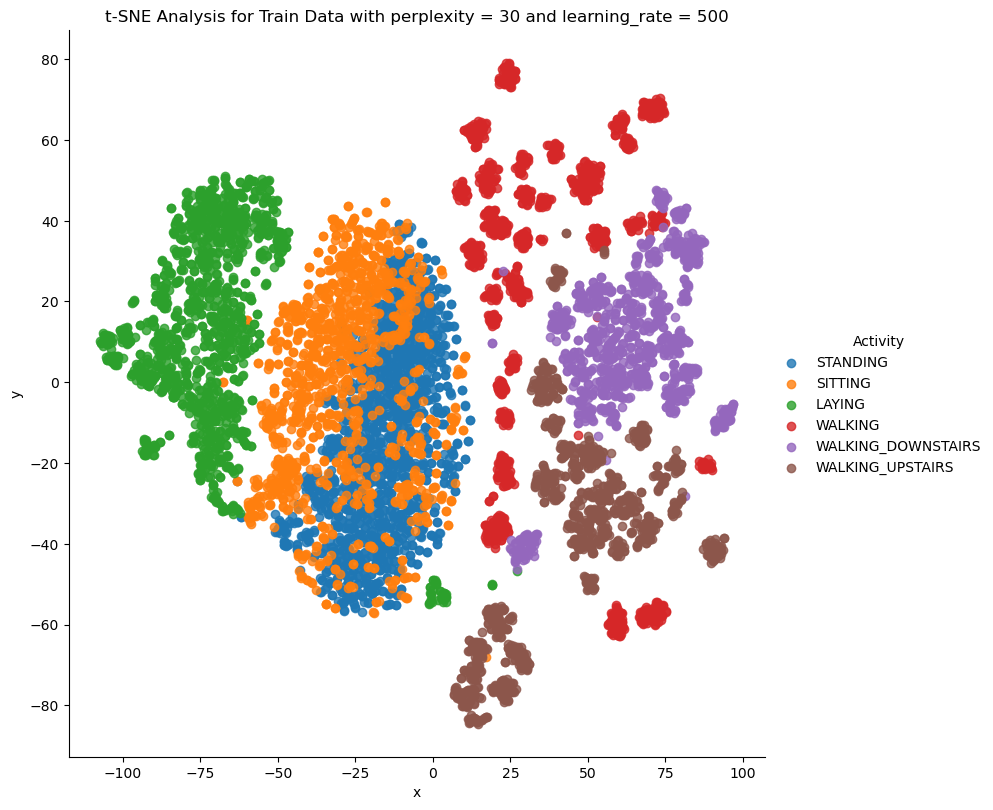

In [13]:
#Perform t-SNE Analysis
#Tasks 2,3, & 4 are performed here

#Initialize t-SNE
for p in [2, 15, 30]:
    for lr in [20, 200, 500]:
        tsne = TSNE(n_components=2, perplexity=p, learning_rate=lr, n_iter=1000, random_state=42)
        # tsne = TSNE(n_components=2, random_state=42)

        # Perform t-SNE analysis on train data
        train_tsne = tsne.fit_transform(train_data)

        # Perform t-SNE analysis on test data
        # test_tsne = tsne.fit_transform(test_data)

        df = pd.DataFrame({'x': train_tsne[:, 0], 'y': train_tsne[:, 1], 'Activity': train_activity})

        sns.lmplot(data=df, x='x', y='y', hue='Activity', fit_reg=False, legend=True, height=8)
        # set title with p and lr
        plt.title('t-SNE Analysis for Train Data with perplexity = {} and learning_rate = {}'.format(p, lr))
        plt.show()
#         break
#     break

Insights: Here we are mapping 561 dim to 2dim, from t-sne plot we can observe that-

1) For perplexity:2 & learning_rate:20 --> The majority of the activities are clearly divided, with the exception of the blue and orange dots, which indicate that the features for standing and sitting overlap. Here, separating the standing and sitting locations is our main task. The summary did not change even as the perplexity changed; all of our points—aside from standing and sitting—are neatly organized. This suggests that even linear models have a reasonable degree of success.
2) For perplexity:2 & learning_rate:200 --> The majority of the activities are clearly divided, with the exception of blue and orange dots, which indicate that the features of standing and sitting still overlap for moderate learning_rate as well.
3) For perplexity:2 & learning_rate:500 --> The majority of the activities are clearly divided, with the exception of blue and red dots, which indicate that the features of standing and sitting still overlap for high learning_rate as well.
4) For perplexity:15 & learning_rate:20 --> All the activities tend to move far away from each other. But, still the blue and orange dots are mixed up with each other, which indicates features for standing and sitting overlap for a moderate perplexity as well.
5) For perplexity:15 & learning_rate:200 --> In this case, only the green dots i.e., laying activity tends to form a neat cluster. And the blue and orange dots still overlap with each other.
6) For perplexity:15 & learning_rate:500 --> In this case, the blue and orange dots still come more closer, indicating that there is no effect on the activities of standing and sitting, even though if we have moderate perplexity and high learning_rate.
7) For perplexity:30 & learning_rate:20 --> Here, majority of activities try to separate out from each other. In this case, the purple and brown dots, i.e., activities walking_upstairs and walking_downstairs tend to get slightly mixed up with each other.
8) For perplexity:30 & learning_rate:200 --> Here, the green dots haven't changed and remain to be in an isolated group. But, the red dots have distributed between purple and brown dots, indicating activities like walking, walking_upstairs, and walking_downstairs are highly associated with each other, which is true in sense.
9) For perplexity:30 & learning_rate:500 --> Here, the green dots, i.e., activitylaying try to elongate and separate slightly from itself. This could be probably because of the high learning_rate. Similarly, the orange and blue dots i.e., activities sitting and standing shrink in the cluster. 

### TASK 6: Comparative Analysis with PCA

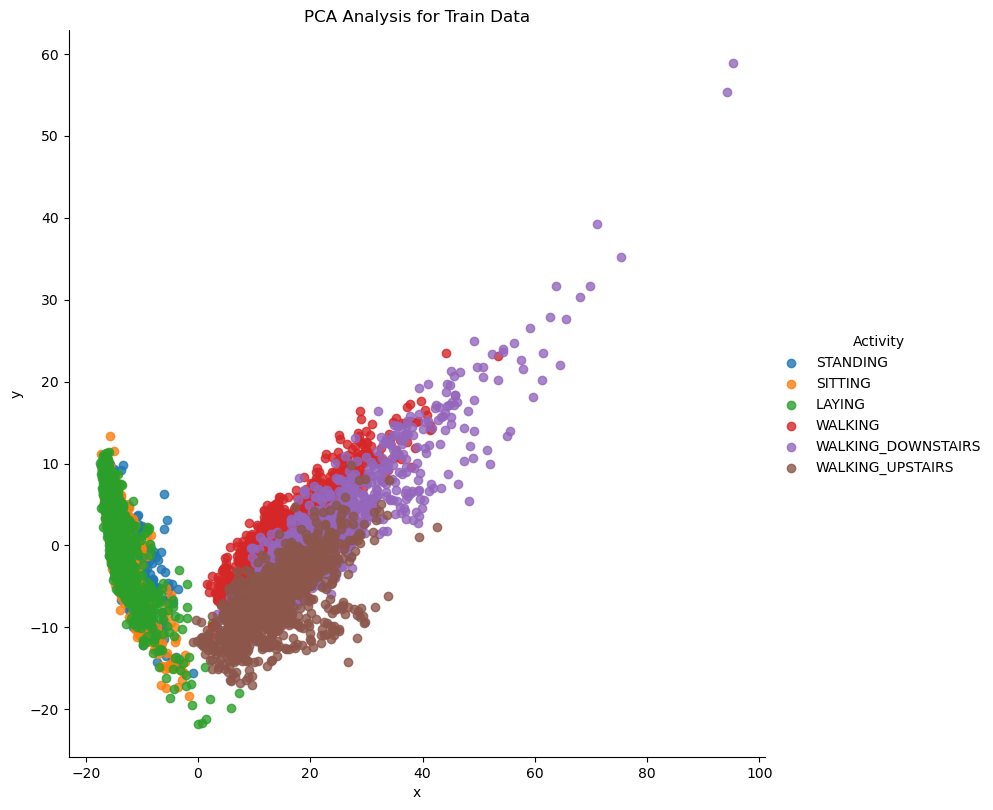

In [17]:
#Perform PCA analysis
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
train_pca = pca.fit_transform(train_data)
df = pd.DataFrame({'x': train_pca[:, 0], 'y': train_pca[:, 1], 'Activity': train_activity})
sns.lmplot(data=df, x='x', y='y', hue='Activity', fit_reg=False, legend=True, height=8)
plt.title('PCA Analysis for Train Data')
plt.show()

Insights: From the above given plot, we can infer that the human activities like walking, walking_upstairs, and walking_downstairs tend to have positive correlation between them, and looks like they can't be easily distinguished from each other. Similarly, activities like standing, sitting, and laying are not distinguishable because they are overlapped on one another. There is no variation in the data points, and hence no significant results are achieved. Also, we could see that there are outliers present in the walking_downstairs activity. Although, these two principal components account for more than 90% of the data's variance, they can only capture the linearity of the features. Since t-SNE can detect non-linearity in data, it performs a superior job at dividing the data into its component classes. Apart from this the time taken to process t-SNE representations is higher than the PCA visulization, because of it's high dimensionality, learning_rate, and non-linearity subspace. While PCA has reduced dimensions in 2D, it generally did not improve the accuracy for most models. This is to be expected because PCA does not alter the data in order to create class distinctions. Although removing fewer variable dimensions might assist prevent overfitting, that doesn't seem to be the case with the rather small training sample. On the contrary, t-SNE attempts to form distinct classes in the form of individual clusters. While PCA does not involve hyperparameters, t-SNE involves hyperparameters like perplexity, learning_rate, etc. PCA can be sensitive to the ordering of the data points, but t-SNE is less sensitive while ordering the data points. In conclusion, t-SNE is a very effective technique for visualizing complex high-dimensional data since it maintains the associations between data points in a lower-dimensional space, whereas PCA protects the variance in the data.